In [94]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import scipy as sp
import matplotlib.image as img
import matplotlib.cm as cm
import cvxpy as cvx
import time
start_time = time.time()

In [95]:
def dct2(x):
        return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)
def idct2(x):
        return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

zoom uint8


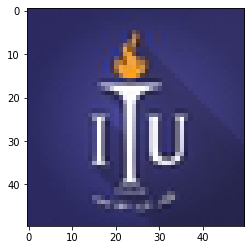

In [96]:
pic=img.imread('itu.jpg')
pic_zoom=pic
'''
print("pic",pic_zoom[:,:,0].dtype)

one =spimg.zoom(pic[:,:,0],0.8)
print("one",one.dtype)
two =spimg.zoom(pic[:,:,1],0.8)
three=spimg.zoom(pic[:,:,2],0.8)

pic_zoom=np.zeros([40,40,3])
pic_zoom[:,:,0]=one
pic_zoom[:,:,1]=two
pic_zoom[:,:,2]=three
'''
print("zoom",pic_zoom.dtype)
plt.imshow((pic_zoom) )
s=0.1
row,col,channel=pic_zoom.shape
k=round(row*col*s)
ri = np.random.choice(row *  col, k, replace=False)
Xa=np.zeros(pic_zoom.shape,dtype=int)
masks = np.zeros(pic_zoom.shape,dtype=int)


(50, 50)

ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -9.779e-21  -0.000e+00  +8e+05  9e-01  1e-02  1e+00  2e+02    ---    ---    1  1  - |  -  - 
 1  +4.662e+03  +4.672e+03  +4e+05  9e-01  6e-03  1e+01  9e+01  0.5178  1e-01   1  1  1 |  0  0
 2  +7.518e+03  +7.568e+03  +3e+05  5e-01  4e-03  5e+01  5e+01  0.9877  6e-01   1  1  0 |  0  0
 3  +1.188e+04  +1.190e+04  +1e+05  3e-01  2e-03  2e+01  2e+01  0.9464  4e-01   1  0  0 |  0  0
 4  +1.450e+04  +1.451e+04  +5e+04  1e-01  7e-04  1e+01  1e+01  0.7060  2e-01   1  0  0 |  0  0
 5  +1.587e+04  +1.588e+04  +3e+04  7e-02  4e-04  5e+00  5e+00  0.5921  2e-01   1  0  0 |  0  0
 6  +1.670e+04  +1.670e+04  +1e+04  3e-02  2e-04  3e+00  3e+00  0.6061  2e-01   1  0  1 |  0  0
 7  +1.713e+04  +1.713e+04  +6e+03  1e-02  7e-05  1e+00  1e+00  0.7073  2e-01   1  0  0 |  0  0
 8  +1.730e+04  +1.730e+04  +3e+03  6

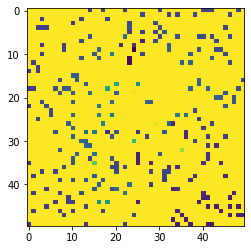

In [97]:

for j in range(channel):
    xx=pic_zoom[:,:,j].squeeze()
    print(xx.shape)
    X = 255 * np.ones(xx.shape)
    X.T.flat[ri] = xx.T.flat[ri]
    plt.imshow(X)
    masks[:,:,j]=X
    b = xx.T.flat[ri].astype(float)
    A = np.kron(spfft.idct(np.identity(col), norm='ortho', axis=0),spfft.idct(np.identity(row), norm='ortho', axis=0))
    
    A = A[ri,:] # same as phi times kron
   

    
    vx = cvx.Variable(row * col)
    objective = cvx.Minimize(cvx.norm(vx, 1))
    constraints = [A*vx == b]
    prob = cvx.Problem(objective,constraints)
    result = prob.solve(verbose=True)
    
    
    x=np.array(vx.value).squeeze()
    x=x.reshape(col,row).T
    Xa[:,:,j] = idct2(x) # inverse cosine transform  (Back to Spatial domain)
     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


--- 35.967411279678345 seconds ---


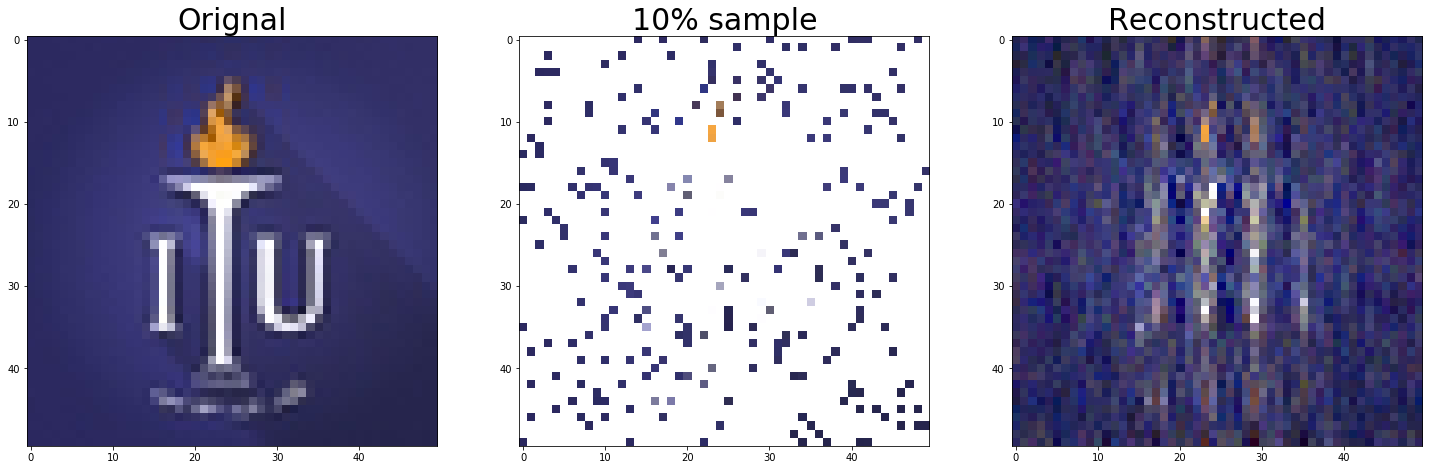

In [98]:

fig,axis=plt.subplots(1,3,figsize=(25,25))
axis[0].imshow(pic)
axis[0].set_title('Orignal',fontsize=30)
axis[1].imshow(masks)
axis[1].set_title('10% sample',fontsize=30)
axis[2].imshow(Xa)
axis[2].set_title('Reconstructed',fontsize=30)


print("--- %s seconds ---" % (time.time() - start_time))
fig.savefig('10_BS',dpi=300)